<b> Functions <b>

In [1]:
from qutip import *
import pylab as py
import numpy as np
import matplotlib.pyplot as plt


def heaviside(x):
    if x >= 0 :
        return 1
    if x < 0 :
        return 0
    
def nega(rho, subsys):
    
    #create mask which counts the number of possible subsystems
    x = [0 for i in rho.dims[0]]
   
    #assigns a 1 in the position of the subsystem for which we want to compute the negativity
    x[subsys] = 1
        
    #takes partial transpose with respect to subsys x
    rho_pt = partial_transpose(rho, x)
    
    #finds eivenvalues of pt matrix
    eig = rho_pt.eigenenergies()
    
    #finds abs value of the eigenvalues
    abs_eig = abs(eig)
    
    negat = 0 #initialize value of negativity
    
    #takes the difference 
    diff = (abs_eig - eig)
    
    
    #computes negativity
    for el in diff:
        negat += el
    
    return negat

<b> Parameters <b>

In [43]:
#INPUT TUNABLE PARAMETER:
# coupling switching frequency = 'fs'
# frequency of cavity photons = 'ph'
# photon's dissipation rates = 'diss'

tune = 'fs'



#time settings
ti = 0 #initial time
tf = 10**(-9)*2 #final time
steps = 2001 #number of steps
tau_list = np.linspace(ti,tf,steps) # vector of time steps

if tune == 'ph' or 'fs':
    # CYCLES FOR FREQUENCY SCAN
    cycles = 21 # number of variations of parameters
    pi = 1
    pf = 0.1
    par_list = np.linspace(pi,pf,cycles)
    par_range = [0 for i in range(cycles)]

if tune == 'diss':
    # CYCLES FOR DISSIPATION SCAN
    cycles = 41 # number of variations of parameters
    pi = 1000
    pf = 1
    par_list = np.linspace(pi,pf,cycles)
    par_range = [0 for i in range(cycles)]

print(par_list)


#initialize entanglement measures vectors
neg = np.zeros([cycles, steps]) #negativity

mut = np.zeros([cycles, steps]) #mutual information

conc = np.zeros([cycles, steps]) #concurrence




[1.    0.955 0.91  0.865 0.82  0.775 0.73  0.685 0.64  0.595 0.55  0.505
 0.46  0.415 0.37  0.325 0.28  0.235 0.19  0.145 0.1  ]


<b> Numerical solution <b>

In [44]:
   
for j in range(0, cycles):

    
    #TUNE FREQUENCY OF PHOTONS
    if tune == 'ph':
        
        #transition frequency
        wc = 10**(9)*2*np.pi*5.439*par_list[j]  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 2*wa #frequency of switching of coupling

        par_range[j] = wc

        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*50 # coupling strength


        #dissipation
        kappa = 1.6*2*np.pi*10**(6)     # cavity dissipation rate
        gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
        gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
        gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
        gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate
    
    
#     #TUNE FREQUENCY OF SWITCHING
    if tune == 'fs':
    
        #transition frequency
        wc = 10**(9)*2*np.pi*4.343  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 20*wa*par_list[j] #frequency of switching of coupling

        par_range[j] = wd

        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*50 # coupling strength


#         #dissipation
#         kappa = 1.6*2*np.pi*10**(6)     # cavity dissipation rate
#         gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
#         gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
#         gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
#         gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate

#        dissipation
        kappa = 0     # cavity dissipation rate
        gamma1 = 0     # atom 1 dissipation rate
        gamma2 = 0     # atom 2 dissipation rate
        gamma_phi1 = 0     # atom 1 dephasing rate
        gamma_phi2 = 0     # atom 2 dephasing rate


#     #TUNE DISSIPATION
    if tune == 'diss':
    
        #transition frequency
        wc = 10**(9)*2*np.pi*4.343  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 2*wa #frequency of switching of coupling


        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*300 # coupling strength


        #dissipation
        kappa = 1.6*2*np.pi*10**(6)*par_list[j]     # cavity dissipation rate
        gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
        gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
        gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
        gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate
    
    
        par_range[j] = kappa



    # intial state (ground state)
    psi0 = tensor(basis(N,0), basis(2,0), basis(2,0))    # start with 0 excited atom and 0 photons



    # density matrix
    rho0 = ket2dm(psi0) #turns ket into a density matrix




    # operators
    a  = tensor(destroy(N), qeye(2), qeye(2)) #destroy cavity photon
    sm1 = tensor(qeye(N), destroy(2), qeye(2)) #destroy atom1 excitation
    sm2 = tensor(qeye(N), qeye(2), destroy(2)) #destroy atom2 excitation


    #list of collapse operator (dissipation ops) for separate baths (for Lindblad's equation)    
    c_op_list = []

    rate = kappa #photon dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a) 


    rate = gamma1 #atom1 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm1)

    rate = gamma2 #atom2 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm2)

    rate = gamma_phi1 #atom1 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm1.dag()*sm1 - qeye(1))/2) )

    rate = gamma_phi2 #atom2 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm2.dag()*sm2 - qeye(1))/2) )




    # Rabi model Hamiltonian for two atoms and a cavity mode for time dependent coupling

    def H1_coeff(t,args):
        coeff = g*heaviside(np.cos((wd)*t+3/2*np.pi))
        return coeff
    
#     def H1_coeff(t,args):
#         coeff = g*heaviside(t)
#         return coeff

    H0 = wc*a.dag()*a + wa*sm1.dag()*sm1 + wa*sm2.dag()*sm2

    H1 = (a.dag()*sm1 + a*sm1.dag() + a.dag()*sm2 + a*sm2.dag() + a*sm1 + a.dag()*sm1.dag() + a*sm2 + a.dag()*sm2.dag())


    H = [H0,[H1,H1_coeff]]





    #solve master equation
#    output = mesolve(H, rho0, tau_list, c_op_list ,[a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2])  #stores expectation values of number of phontons, excitation of atom 1 and 2 

    result = mesolve(H, rho0, tau_list, c_op_list)  #stores density matrix operator changing in time


    # plot excitation probabilities of photons and atoms
#     plt.plot(tau_list, output.expect[0], label="Cavity")
#     plt.plot(tau_list, output.expect[1], label="Atom 1 excited state")
#     plt.plot(tau_list, output.expect[2], label="Atom 2 excited state")
#     plt.legend()
#     plt.xlabel('Time')
#     plt.ylabel('Occupation probability')
#     plt.title('Vacuum Rabi oscillations');
#     plt.show()



    x = [1,2] # selects the system to NOT trace over (0=photons, 1=atom1, 2=atom2)

    for i in range(steps):
        states = result.states[i]*result.states[i].dag() # creates density matrix at each time 

        rhoqub = states.ptrace(x) # traces over the photonic degrees of freedom to obtain the density matrix of the qubits

        conc[j][i] = concurrence(rhoqub) # computes concurrence between qubits 

        neg[j][i] = nega(rhoqub, 0) #computes negativity between a qubit and the rest of the system
    
    print(j)


#SAVE DATA
if tune == 'fs':
    np.save('data/conc_2q_fs', conc)
    np.save('data/neg_2q_fs', neg)

if tune == 'ph':
    np.save('data/conc_2q_ph', conc)
    np.save('data/neg_2q_ph', neg)

if tune == 'diss':
    np.save('data/conc_2q_diss', conc)
    np.save('data/neg_2q_diss', neg)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [45]:
cont = 0

conc_an = np.zeros([cycles, steps]) #concurrence

neg_an = np.zeros([cycles, steps]) #concurrence

for j in range(0, cycles):

    cont = 0
    
    wd = 20*wa*par_list[j] #frequency of switching of coupling

    par_range[j] = wd
    
    T=2*np.pi/(wd)
    
    for t in tau_list:


        a11 = -g/(2*(wc+wa))*(1 - (2*np.exp(-complex(0,1)*(wc+wa)*t))/(1+np.exp(complex(0,1)*(wc+wa)*T/2)) )
        a12 = a11


        a21 = (g**2*(2*np.exp(-complex(0,1)*t*(wa + wc)) + complex(0,1)*(2*t + T)*(wa + wc) - 2*(1/(np.cos((T/4*(wa + wc)))))**2 - (2*complex(0,1))*(1 + np.exp((-complex(0,1))*t*(wa + wc)))*np.tan((T*(wa + wc))/4)))/(4*(wa + wc)**2)

        b0 = 1/(wa**2 + wa*wc)
        b1 = 2*complex(0,1)*np.exp(-complex(0,1)*t*(wa+wc))*(complex(0,1) + np.tan(T/4*(wa+wc)))/(wa**2 - wc**2)
        b2 = np.exp(-2*complex(0,1)*t*wa)*(wa+wc)/(wa*(wa-wc)*(wa+wc))
        b3 = np.exp(-2*complex(0,1)*t*wa)*(-2*complex(0,1)*wc*np.tan(T*wa/2))/(wa*(wa-wc)*(wa+wc))
        b4 = np.exp(-2*complex(0,1)*t*wa)*( 2*wa*np.tan(T*(wc-wa)/4)*(complex(0,1)+np.tan(T*(wa+wc)/4))  )/(wa*(wa-wc)*(wa+wc))

        a22 = (g**2)/4*(b0+b1+b2+b3+b4)

        #state found analytically
        psi0_an = tensor(basis(N,0), basis(2,0), basis(2,0)) + (a11)*tensor(basis(N,1), basis(2,1), basis(2,0)) + (a12)*tensor(basis(N,1), basis(2,0), basis(2,1)) + a21*tensor(basis(N,0), basis(2,0), basis(2,0)) + a22*tensor(basis(N,0), basis(2,1), basis(2,1)) 
        psi0_an = psi0_an.unit()



        #density matrix
        rho0_an = ket2dm(psi0_an)

        x = [1,2] # selects the system to NOT trace over (0=photons, 1=atom1, 2=atom2)
        rhoqub_an = rho0_an.ptrace(x)
        
        
        conc_an[j][cont] = concurrence(rhoqub_an)
        
        neg_an[j][i] = nega(rhoqub_an, 0) #computes negativity between a qubit and the rest of the system


        cont += 1
        
    print(j)
    
#SAVE DATA
if tune == 'fs':
    np.save('data/conc_an_2q_fs', conc_an)
    np.save('data/neg_an_2q_fs', neg_an)

if tune == 'ph':
    np.save('data/conc_an_2q_ph', conc_an)
    np.save('data/neg_an_2q_ph', neg_an)

if tune == 'diss':
    np.save('data/conc_an_2q_diss', conc_an)
    np.save('data/neg_an_2q_diss', neg_an)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


<b> Plot dependence on parameters

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


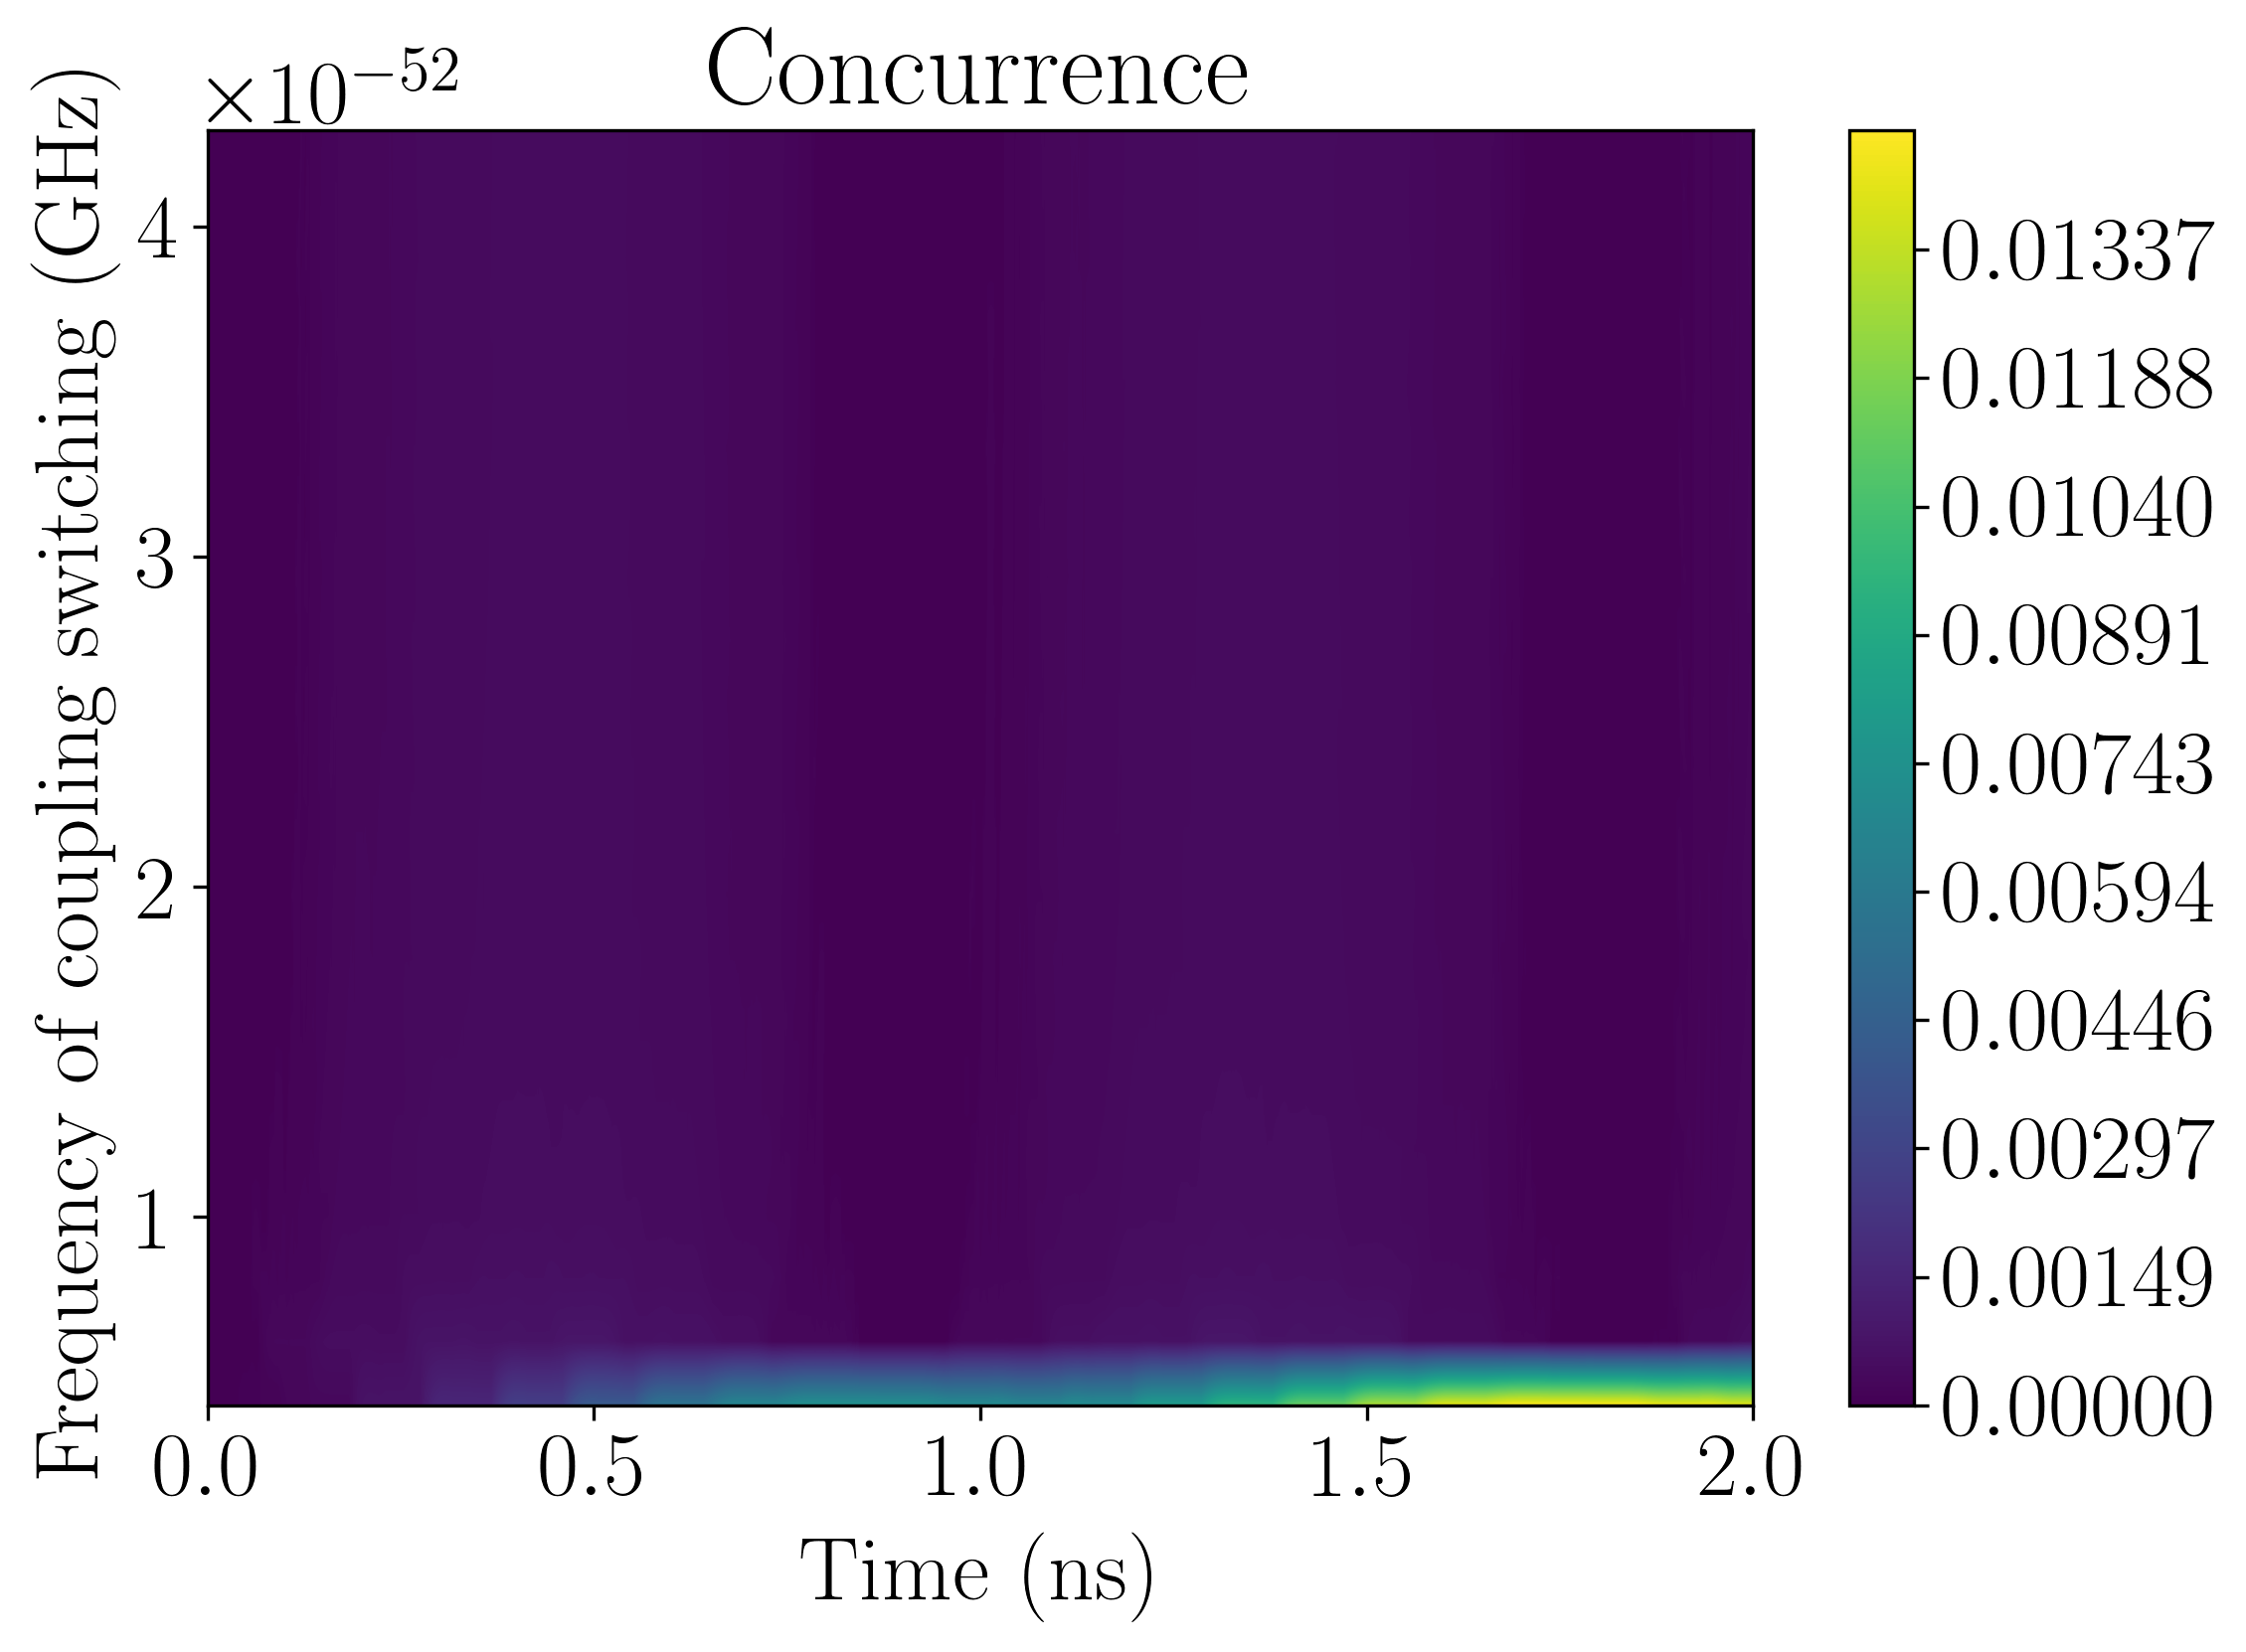

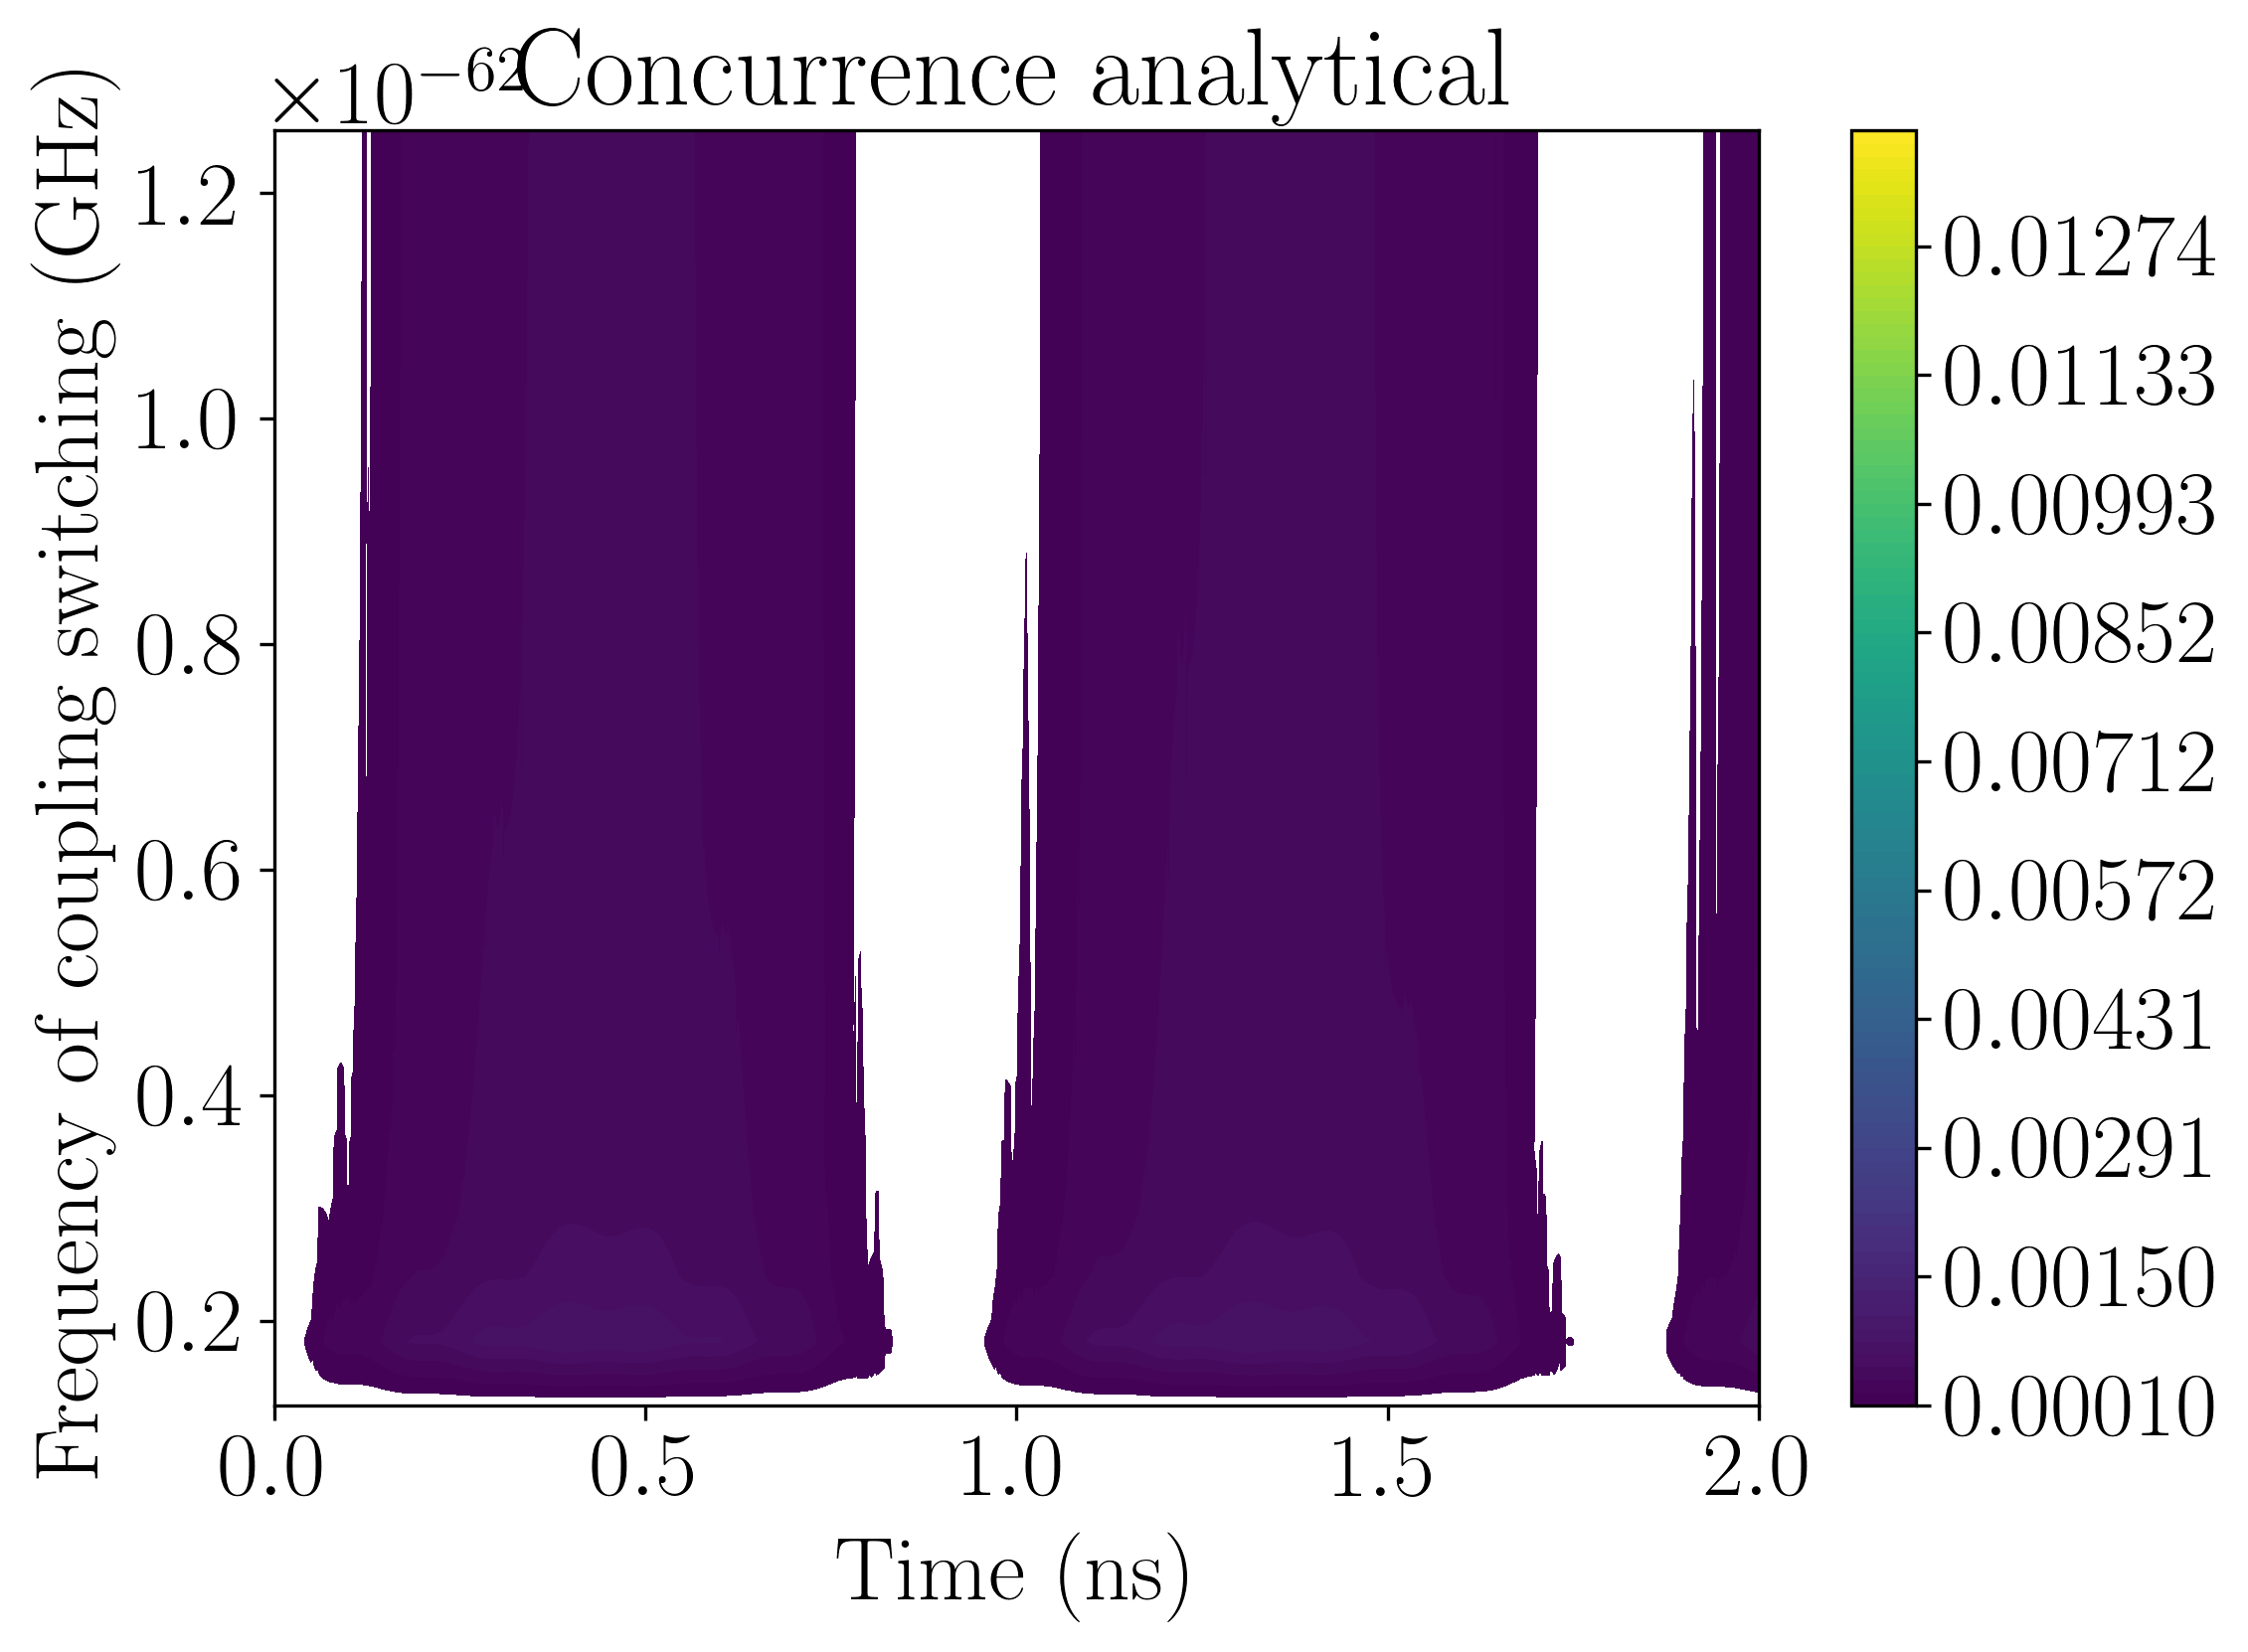

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


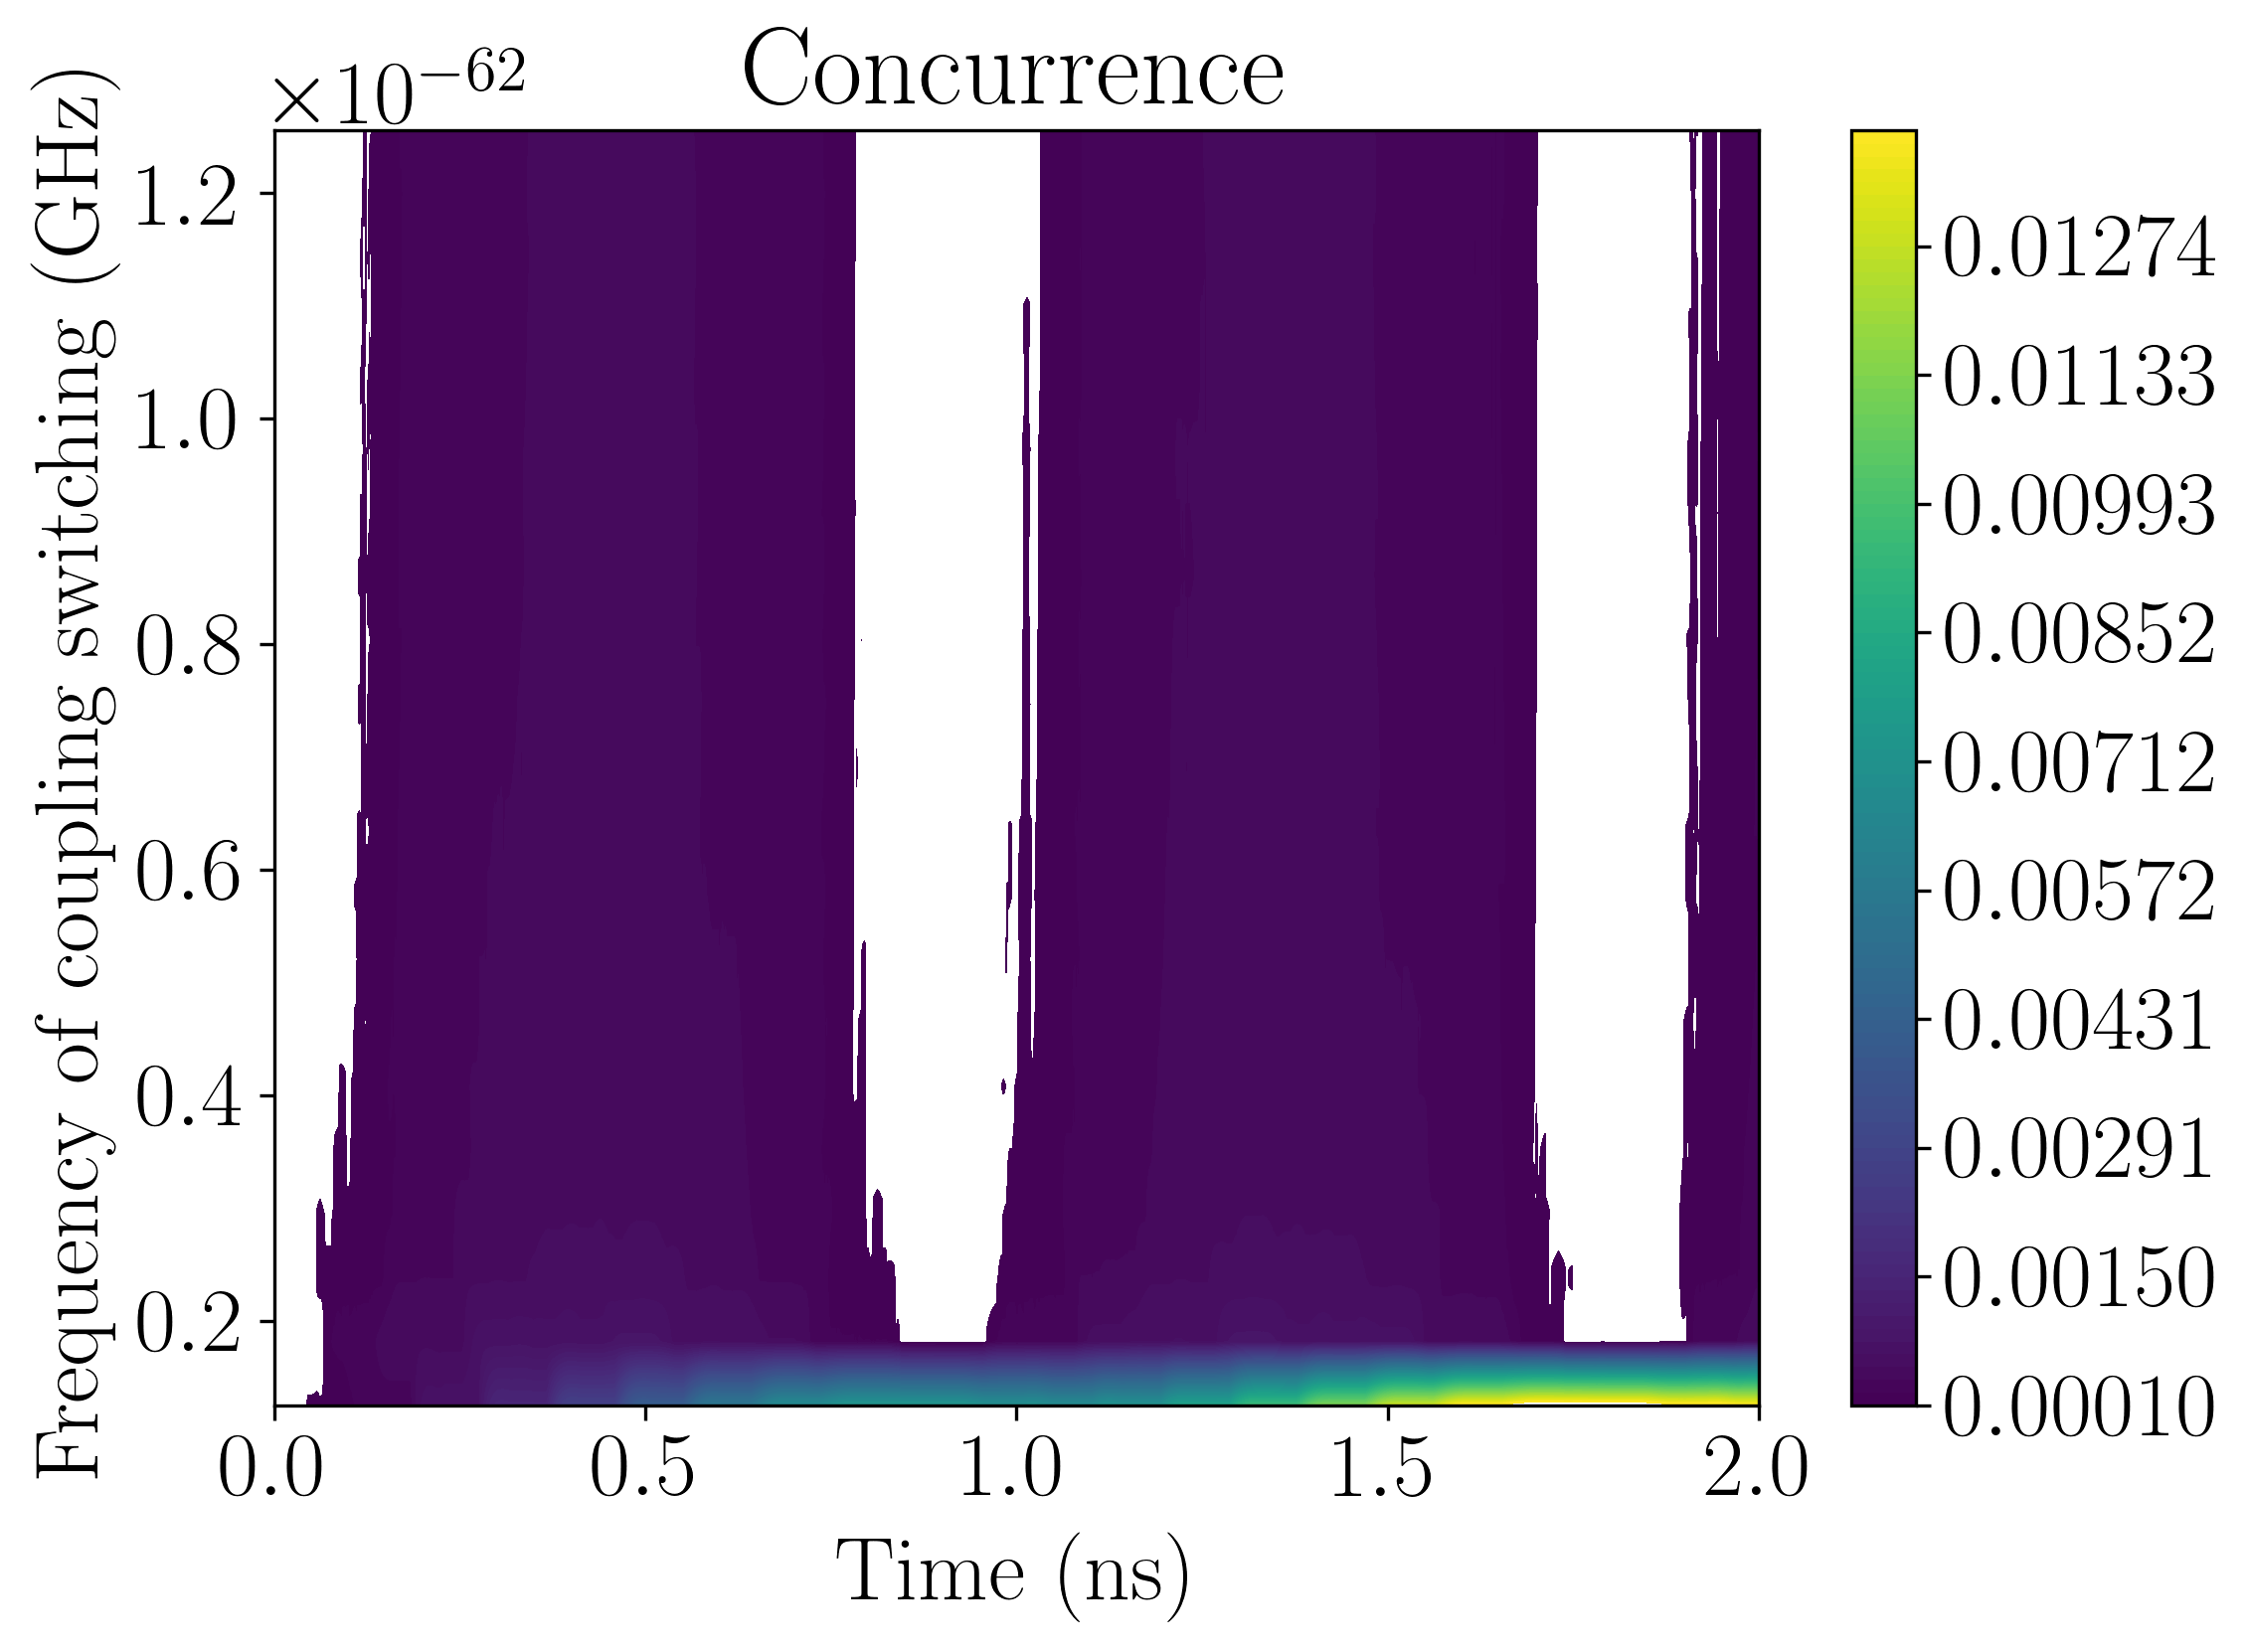

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


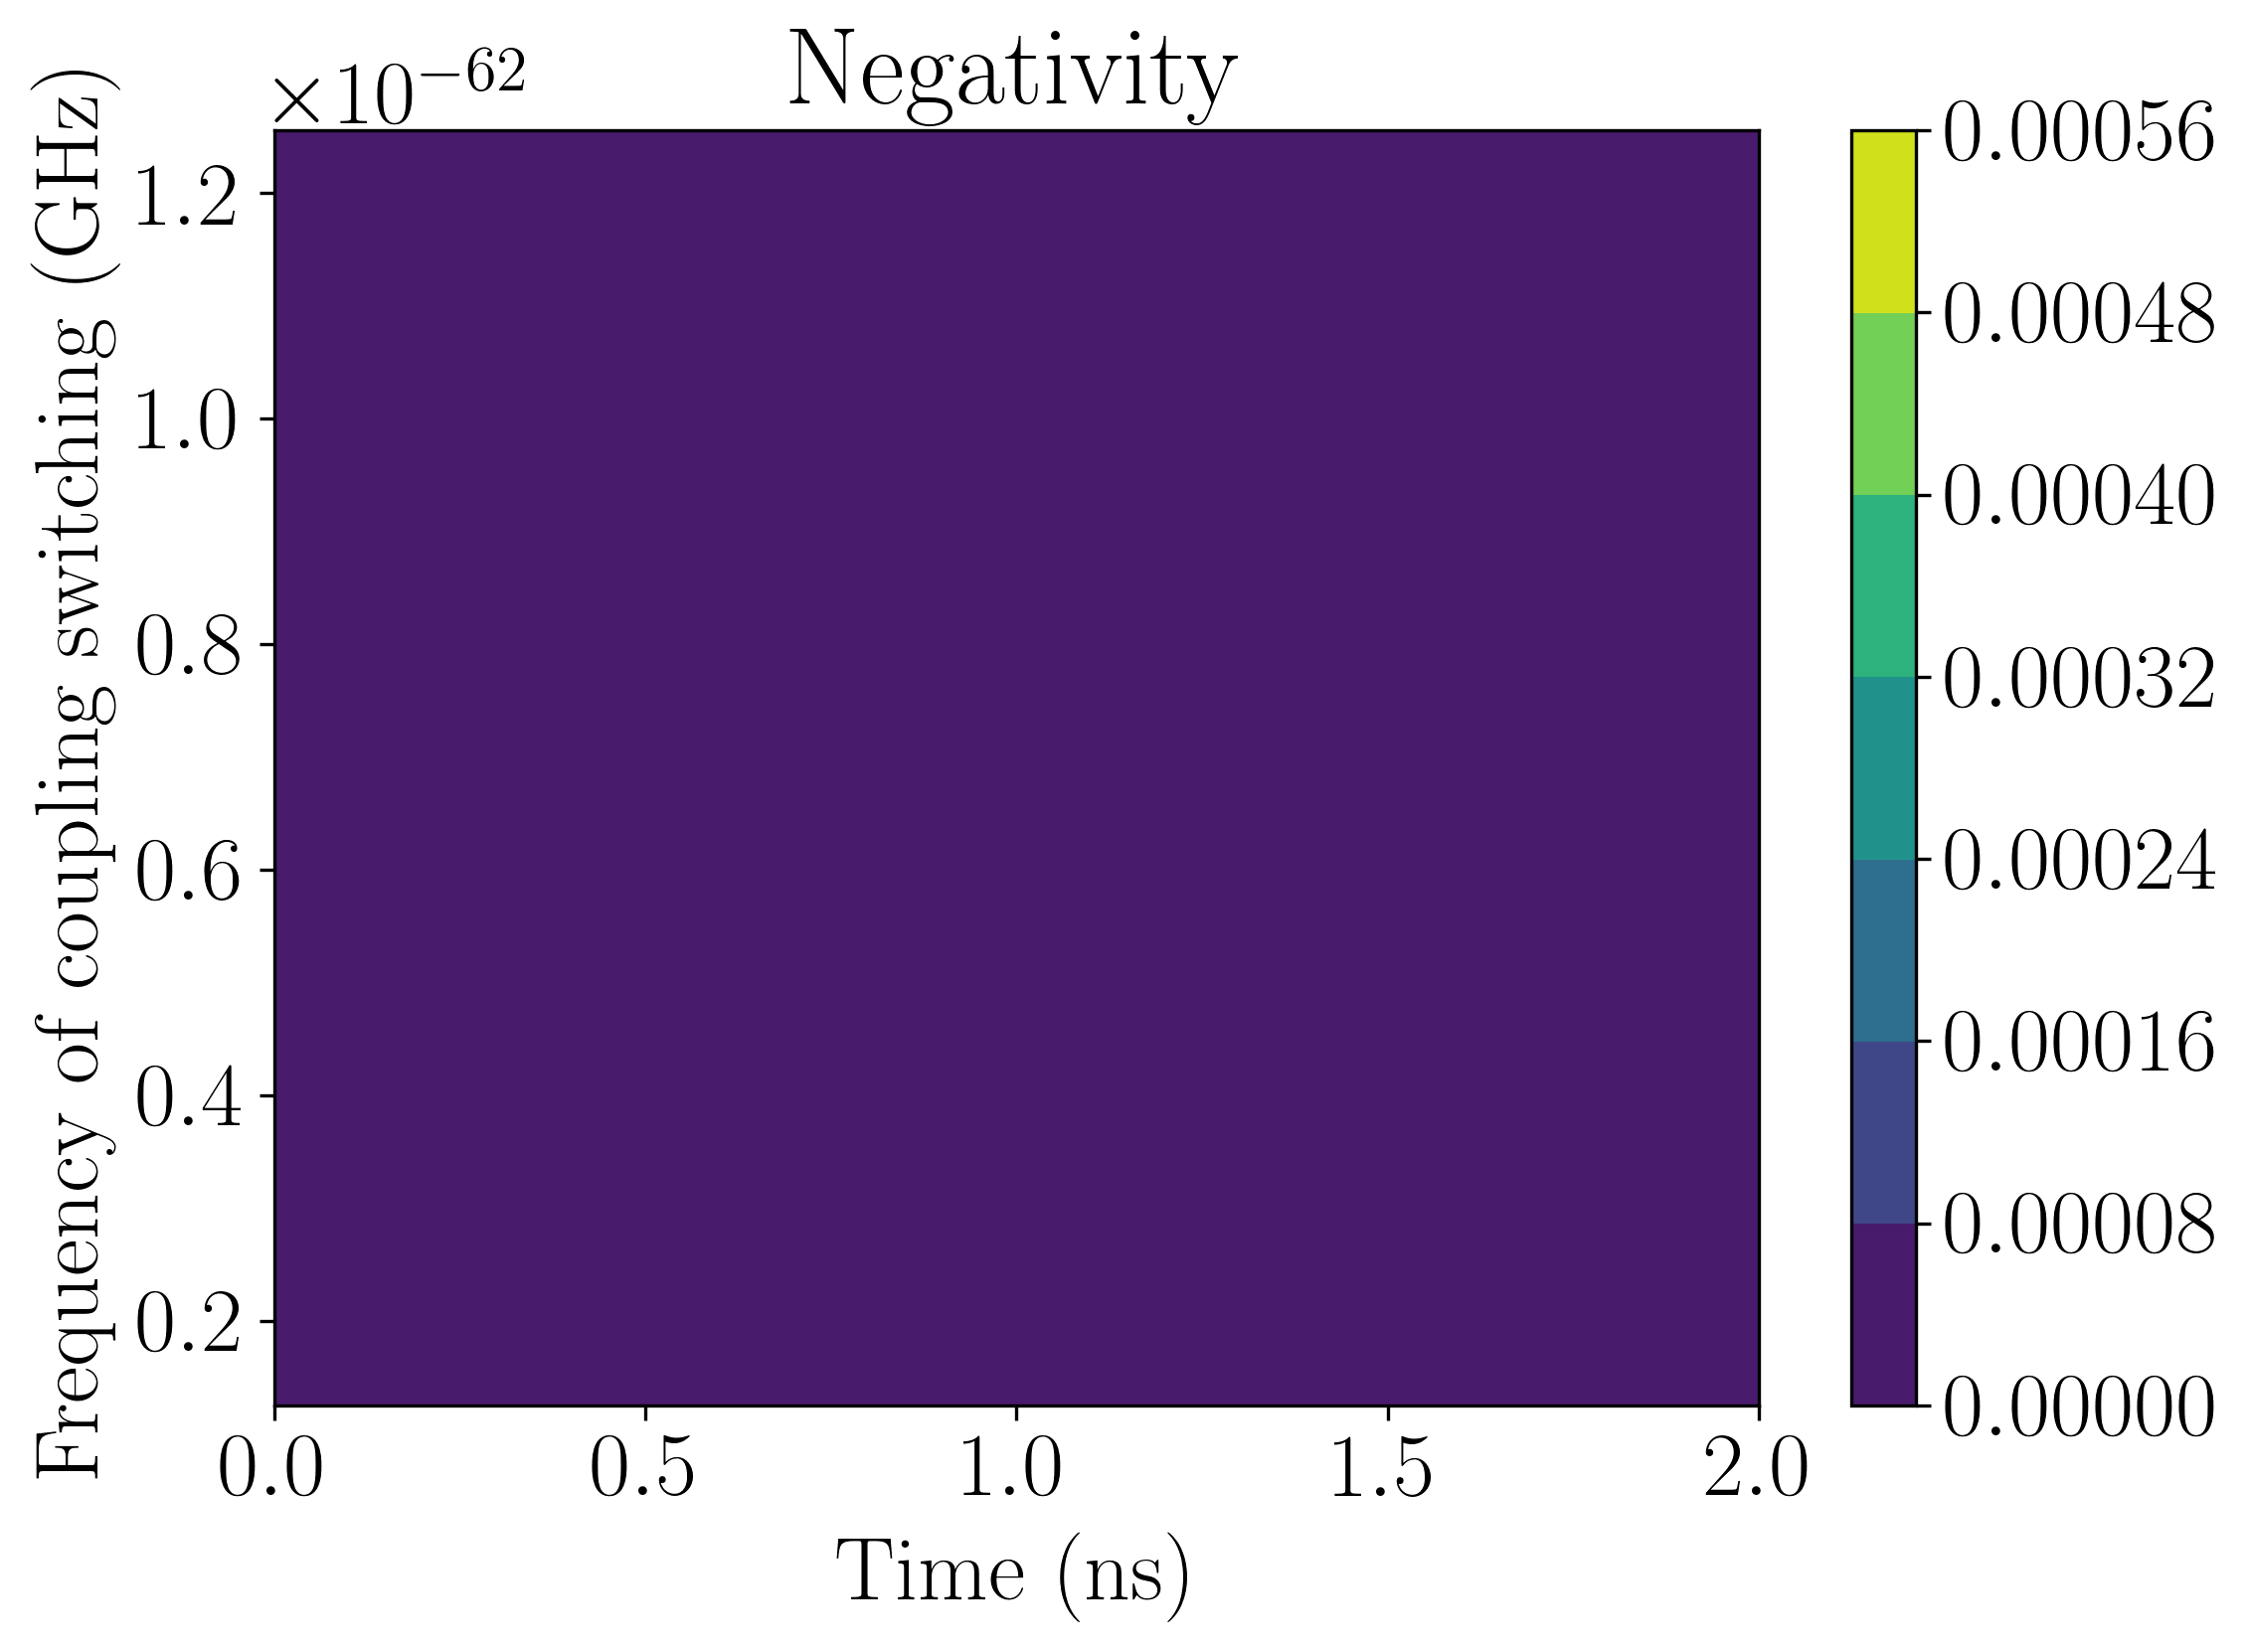

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


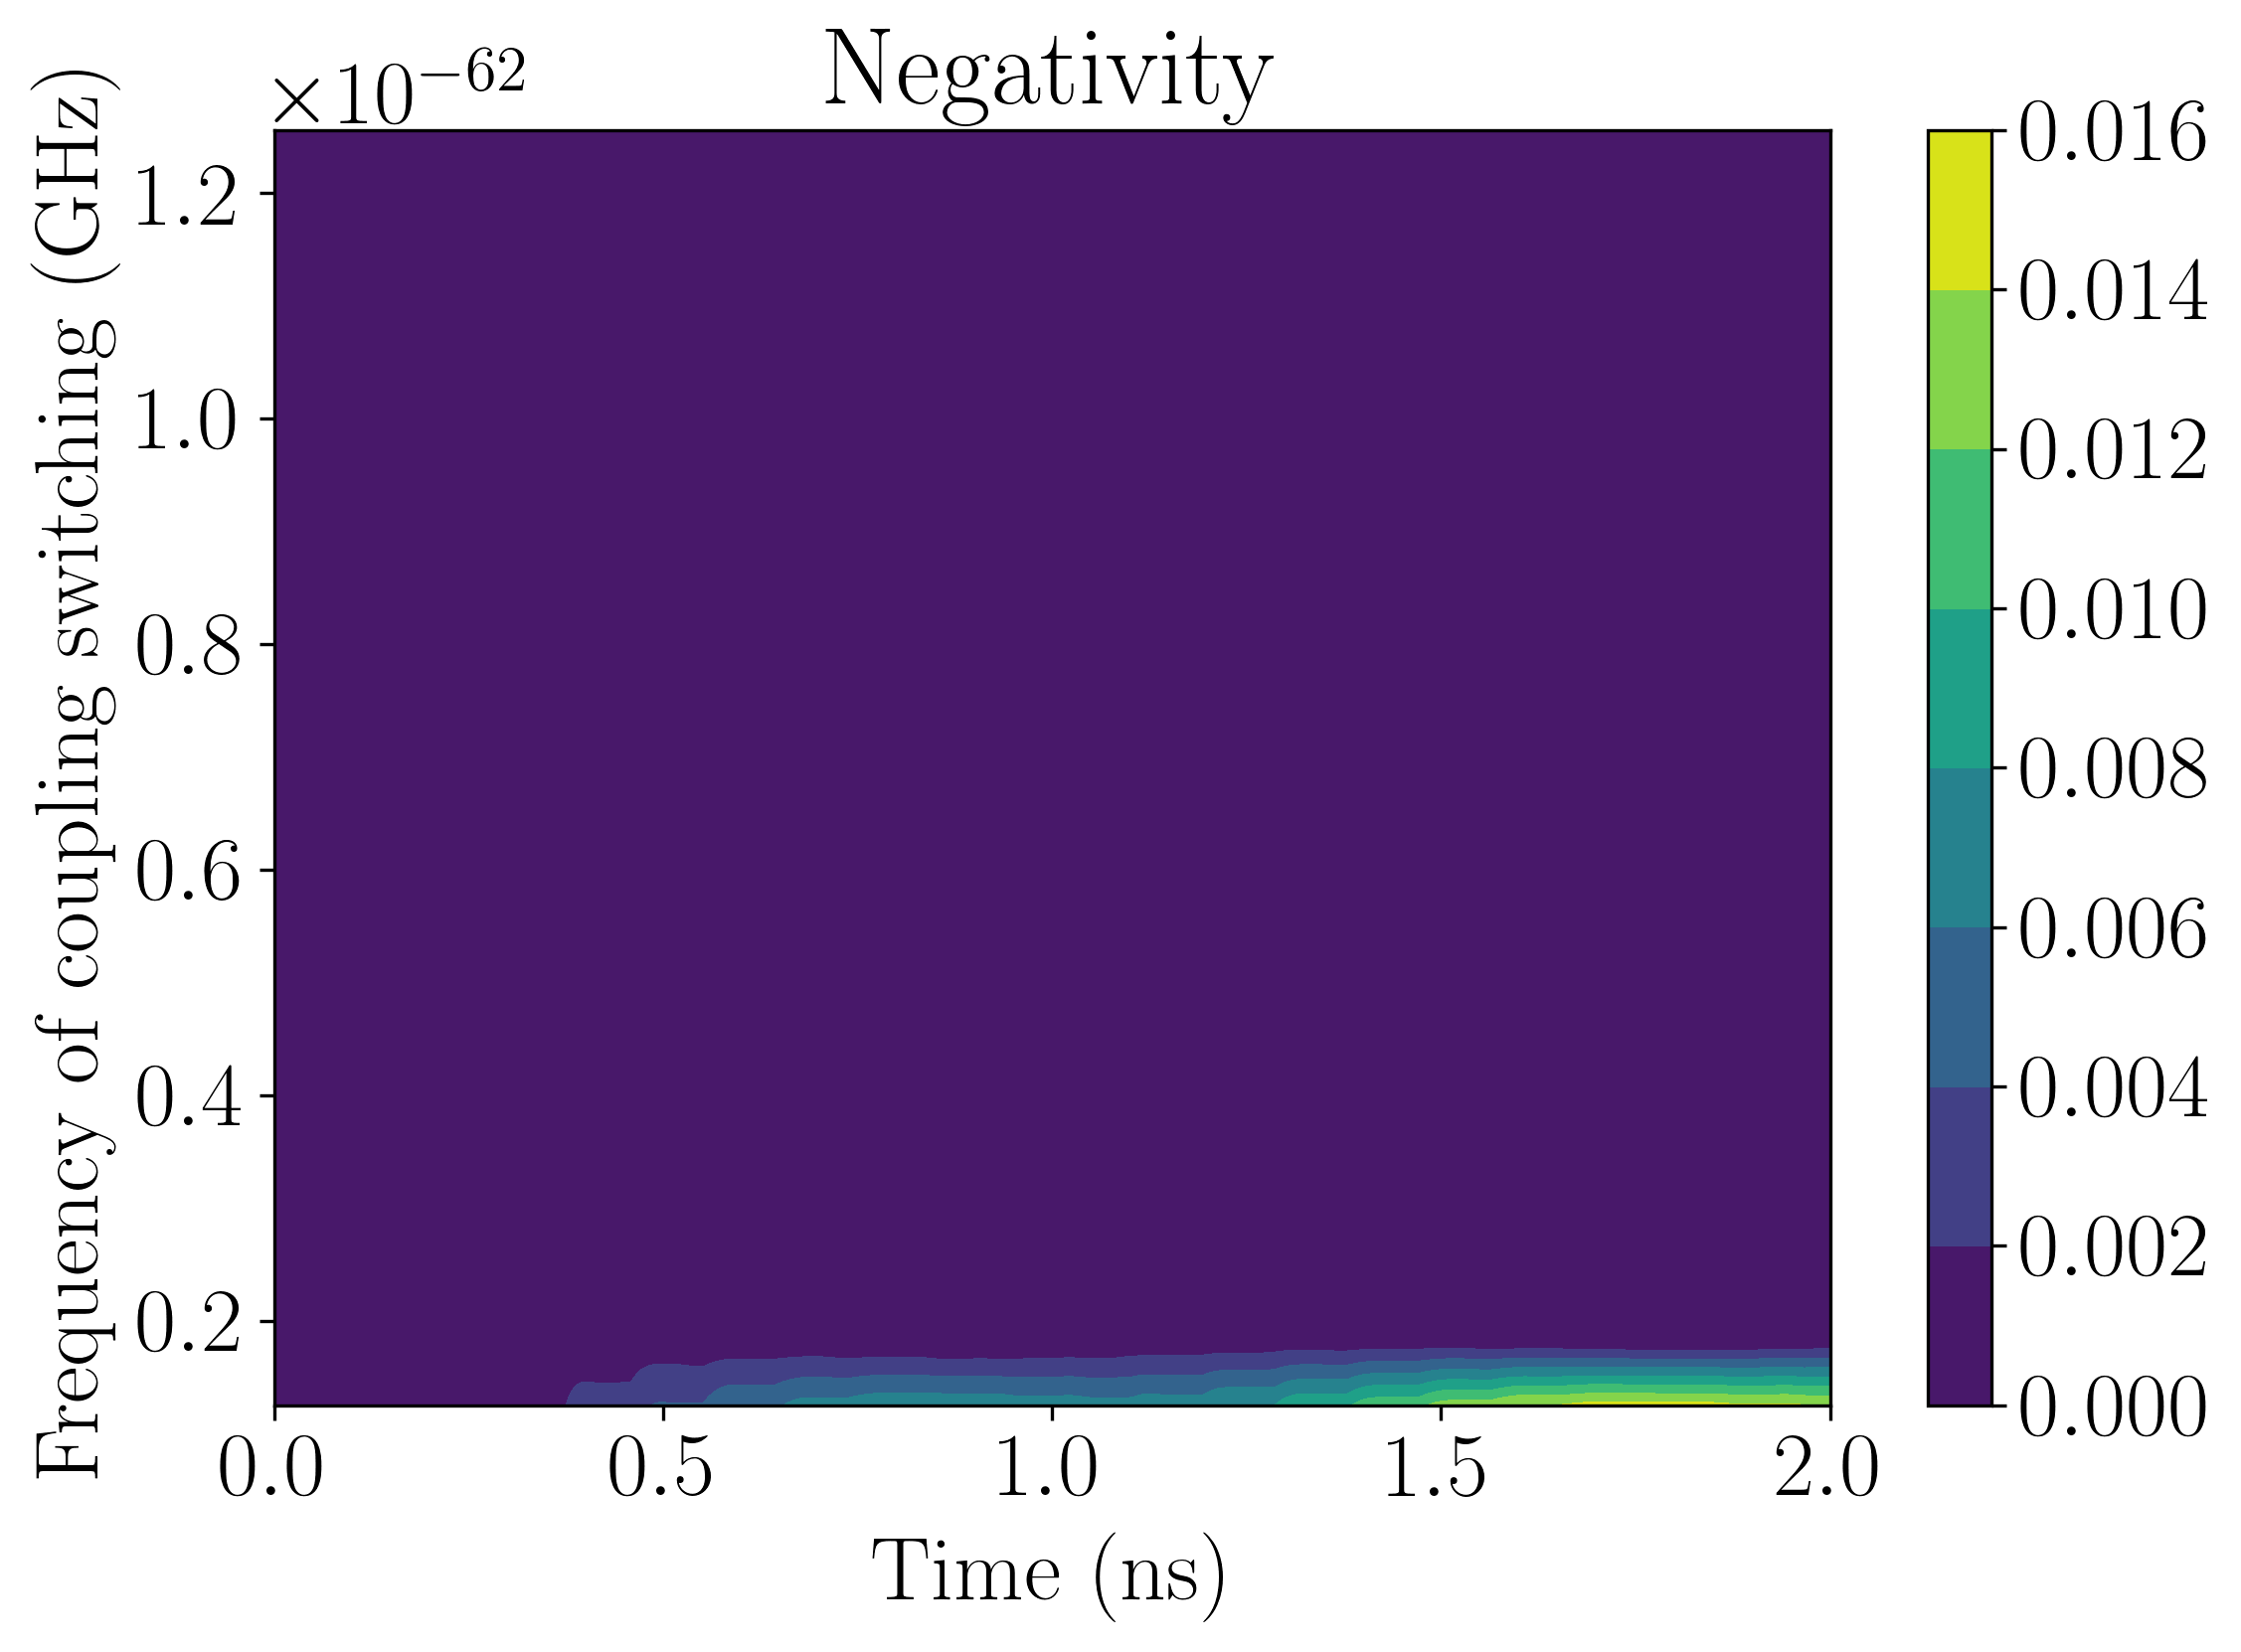

In [52]:
#changes plot parameters
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

x = np.linspace(0.0001, 0.014, 100)

#LOAD DATA
if tune == 'fs':
    c = np.load('data/conc_2q_fs.npy')
    c_an = np.load('data/conc_an_2q_fs.npy')
    n = np.load('data/neg_2q_fs.npy')
    n_an = np.load('data/neg_an_2q_fs.npy')
if tune == 'ph':
    c = np.load('data/conc_2q_ph.npy')
    c_an = np.load('data/conc_an_2q_ph.npy')
    n = np.load('data/neg_2q_ph.npy')
    n_an = np.load('data/neg_an_2q_ph.npy')
if tune == 'diss':
    c = np.load('data/conc_2q_diss.npy')
    c_an = np.load('data/conc_an_2q_diss.npy')
    n = np.load('data/neg_2q_diss.npy')
    n_an = np.load('data/neg_an_2q_diss.npy')

for j in range(len(par_range)):
    par_range[j] = par_range[j]/wa 


# plot time evolution of concurrence (x = time) for different values of wc (y = wc)

if tune == 'fs':
    ylab = r'Frequency of coupling switching (GHz)'
if tune == 'ph':    
    ylab = r'Frequency of cavity photons (GHz)'
if tune == 'diss':    
    ylab = r'Photons dissipation rate (GHz)'
    

#analytical
plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,c_an, x)
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(ylab, fontsize = 22)
plt.colorbar()  # draw colorbar
plt.title('Concurrence analytical')
plt.savefig('concurrence_2q_fs.eps', dpi = 300)
plt.show()

#numerical
plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,c, x)
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(r'Frequency of coupling switching (GHz)', fontsize = 22)
plt.colorbar()  # draw colorbar
plt.title('Concurrence')
plt.savefig('concurrence_2q_fs.eps', dpi = 300)
plt.show()


# plot time evolution of negativity (x = time) for different values of wc (y = wc)

# analytical
plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,n_an)
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(r'Frequency of coupling switching (GHz)', fontsize = 22)
plt.title('Negativity')
plt.colorbar()  # draw colorbar
plt.savefig('negativity_2q_fs.eps', dpi = 300)
plt.show()

# numerical
plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.contourf(tau_list*10**9,par_range,n)
plt.xlabel(r' Time (ns)', fontsize = 22)
plt.ylabel(r'Frequency of coupling switching (GHz)', fontsize = 22)
plt.title('Negativity')
plt.colorbar()  # draw colorbar
plt.savefig('negativity_2q_fs.eps', dpi = 300)
plt.show()

# if tune == 'ph':
#     plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
#     plt.contourf(tau_list*10**9,par_range,c)
#     plt.xlabel(r' Time (ns)', fontsize = 22)
#     plt.ylabel(r'Frequency of cavity photons (GHz)', fontsize = 22)
#     plt.colorbar()  # draw colorbar
#     plt.title('Concurrence')
#     plt.savefig('concurrence_2q_ph.eps', dpi = 300)
#     plt.show()


#     # plot time evolution of negativity (x = time) for different values of wc (y = wc)

#     plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
#     plt.contourf(tau_list*10**9,par_range,n)
#     plt.xlabel(r' Time (ns)', fontsize = 22)
#     plt.ylabel(r'Frequency of cavity photons (GHz)', fontsize = 22)
#     plt.title('Negativity')
#     plt.colorbar()  # draw colorbar
#     plt.savefig('negativity_2q_ph.eps', dpi = 300)
#     plt.show()


# if tune == 'diss':
#     plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
#     plt.contourf(tau_list*10**9,par_range,c)
#     plt.xlabel(r' Time (ns)', fontsize = 22)
#     plt.ylabel(r'Photons dissipation rate (GHz)', fontsize = 22)
#     plt.colorbar()  # draw colorbar
#     plt.title('Concurrence')
#     plt.savefig('concurrence_2q_diss.eps', dpi = 300)
#     plt.show()


#     # plot time evolution of negativity (x = time) for different values of wc (y = wc)

#     plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
#     plt.contourf(tau_list*10**9,par_range,n)
#     plt.xlabel(r' Time (ns)', fontsize = 22)
#     plt.ylabel(r'Photons dissipation rate (GHz)', fontsize = 22)
#     plt.title('Negativity')
#     plt.colorbar()  # draw colorbar
#     plt.savefig('negativity_2q_diss.eps', dpi = 300)
#     plt.show()



